In [163]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from itertools import combinations

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [164]:
df1 = pd.read_csv("Files/Customer Flight Activity_limpio.csv")
df1.sample()

,numero_cliente,ano,mes,vuelos_reservados,vuelos_con_acompanantes,total_vuelos,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_los_puntos_canjeados,dia,fecha
178233,690641,2017,11,2,2,4,1416,141.0,0,0,1,2017-11-01


In [165]:
df1['ano'] = df1['ano'].astype(int)
df1['mes'] = df1['mes'].astype(int)
df1['dia'] = 1

# Crear la columna de fecha combinando año, mes y día
df1['fecha'] = pd.to_datetime(df1[['ano', 'mes', 'dia']].rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'}))

# Verifica el resultado
print(df1[['ano', 'mes', 'dia', 'fecha']].head())

    ano  mes  dia      fecha
0  2017    1    1 2017-01-01
1  2017    1    1 2017-01-01
2  2017    1    1 2017-01-01
3  2017    1    1 2017-01-01
4  2017    1    1 2017-01-01


In [166]:
df2 = pd.read_csv("Files/Customer Loyalty History_limpio.csv")
df2.sample()

,numero_cliente,pais,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,ano_inscripcion,mes_inscripcion,ano_cancelacion,mes_cancelacion,estado_cliente
15570,756967,Canada,Quebec,Montreal,H2T 2J6,Female,College,66937.5,Single,Star,9904.98,Standard,2012,6,2099,12,Activo


In [167]:
df = pd.read_csv("Files/datos_limpio_unidos.csv")
df.sample()

,numero_cliente,ano,mes,vuelos_reservados,vuelos_con_acompanantes,total_vuelos,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_los_puntos_canjeados,dia,fecha,pais,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,ano_inscripcion,mes_inscripcion,ano_cancelacion,mes_cancelacion,estado_cliente
129780,782523,2017,8,0,0,0,0,0.0,0,0,1,2017-08-01,Canada,Ontario,Toronto,M2P 4F6,Female,Bachelor,56443.0,Married,Star,4547.89,Standard,2018,9,2099,12,Activo


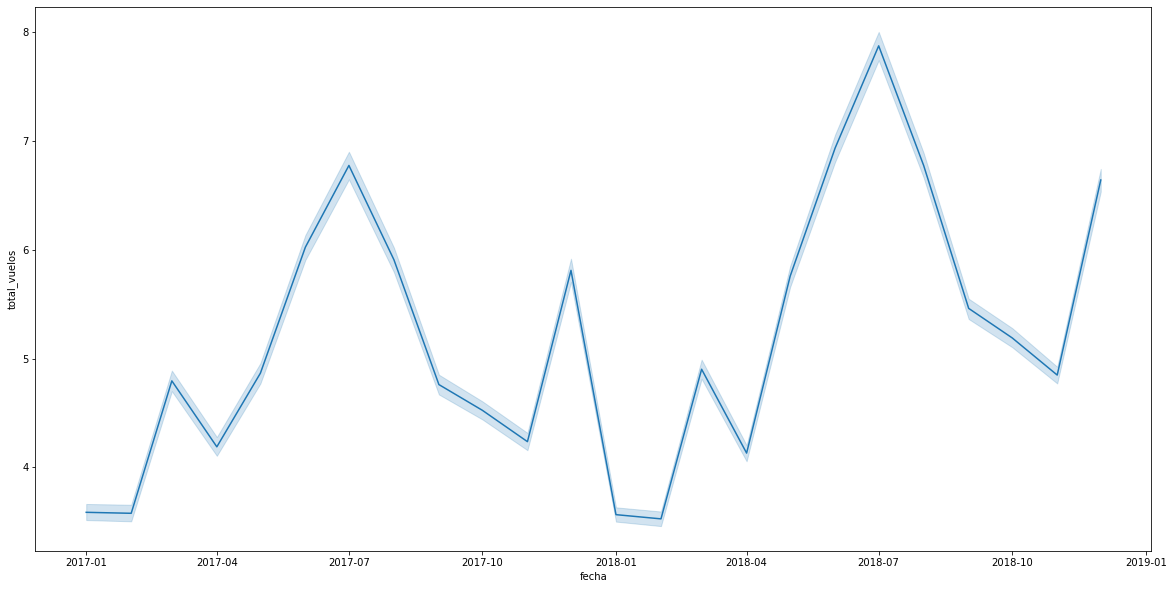

In [168]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df1, x="fecha", y="total_vuelos");

En esta gráfica vemos que los meses donde hay mas reservas en es verano y navidad. teniendo el pico mas alto (en ambos años) en julio. Vamos a ver como ha evolucionado esto de un año a otro en la siguiente gráfica

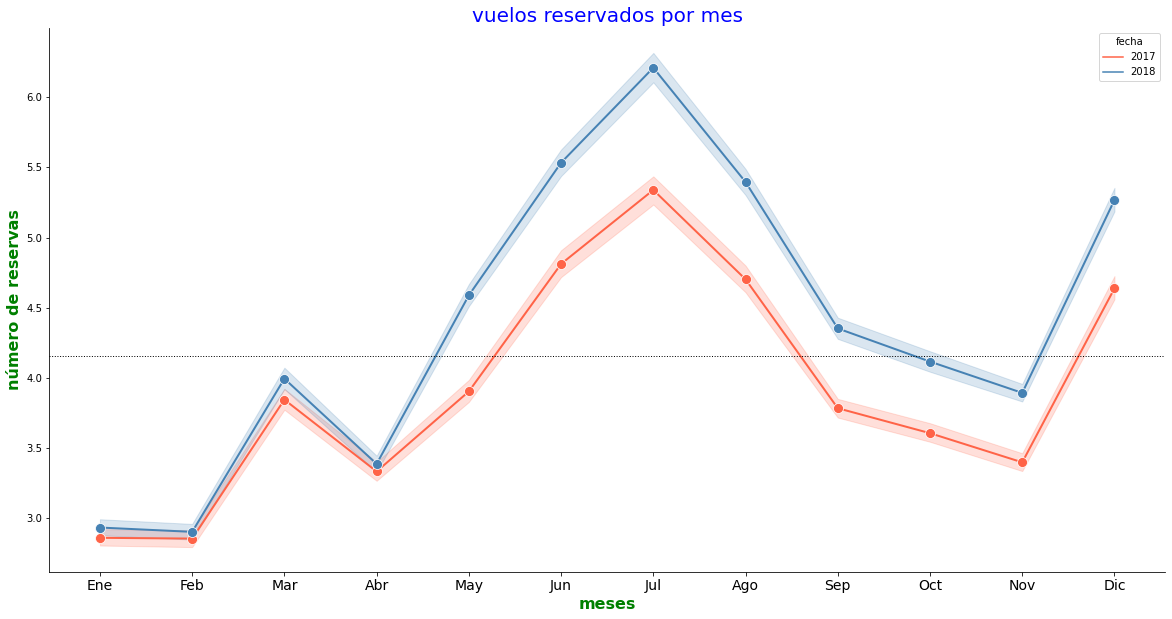

In [169]:
# hagamos un subplot con el vuelos_reservados y en función del mes

plt.subplots( figsize = (20, 10))

sns.lineplot(x=df1["fecha"].dt.month, y=df1["vuelos_reservados"],
            hue = df1["fecha"].dt.year,
            palette = ["#FF6347", "#4682B4"], # color de las lineas            
            marker = "o", # para especificar que marcador queremos
            markersize = 10, # para establecer el tamaño del marcador
            linewidth = 2 # para cambiar el grosor de la linea
            )

plt.title("vuelos reservados por mes",color = "blue", fontsize= 20)


# para cambiar las etiquetas del eje x y sus colores y tamaños
plt.xticks(np.sort(df1["fecha"].dt.month.unique()),  # valores originales del eje x
                ['Ene', "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], 
                color = "black", 
                fontsize = 14); # valores nuevos que queremos en el eje x

# para cambiar el nombre del eje x
plt.xlabel('meses', color = "green", fontweight = "bold", fontsize = 16)

# para cambiar el nobre el eje y
plt.ylabel('número de reservas', color = "green", fontweight = "bold", fontsize = 16)

# para quitar los ejes de arriba y de la derecha       
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


# para añadir una linea fija en el plot en funcion de la media
media = df1["vuelos_reservados"].mean()
plt.axhline(media, color='black', linewidth=1, linestyle='dotted');


Vemos lo mismo que veiamos en la gráfica anterior (suben las reservas en verano y navidad) pero tambien vemos que el numero de reservas ha sido mayor en el 2018

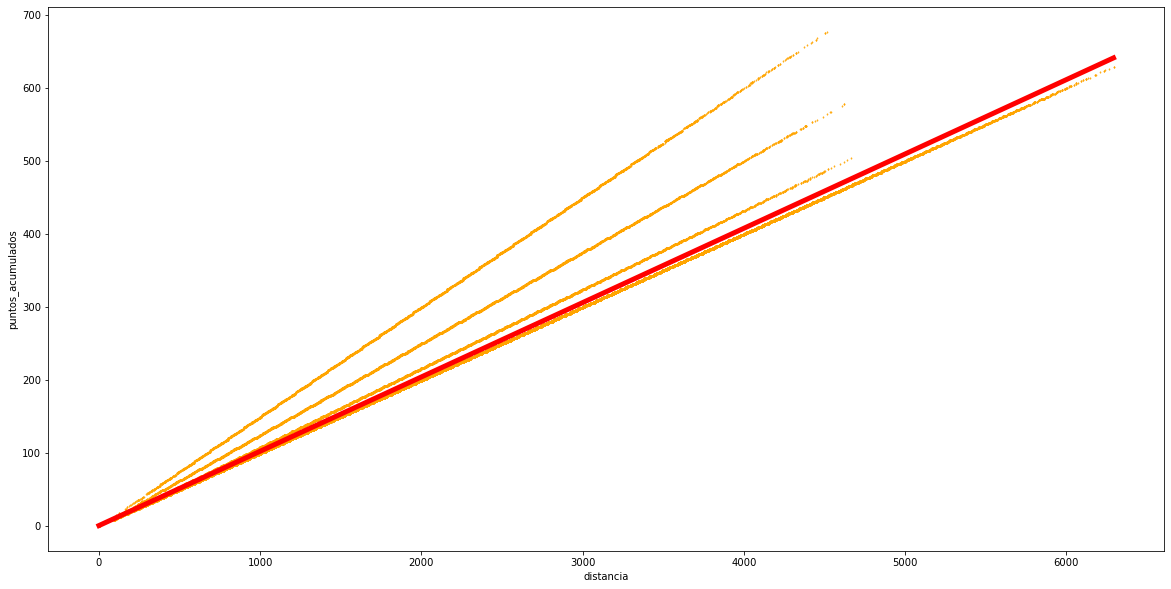

In [170]:
plt.figure(figsize=(20, 10))
sns.regplot(x = "distancia", 
            y = "puntos_acumulados", 
            data = df1, 
            marker = "d", 
            line_kws = {"color": "red", "linewidth": 5}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "orange", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            );

In [174]:
df.columns

Index(['numero_cliente', 'ano', 'mes', 'vuelos_reservados',
       'vuelos_con_acompanantes', 'total_vuelos', 'distancia',
       'puntos_acumulados', 'puntos_canjeados',
       'costo_en_dolares_de_los_puntos_canjeados', 'dia', 'fecha', 'pais',
       'provincia', 'ciudad', 'codigo_postal', 'genero', 'educacion',
       'salario', 'estado_civil', 'tarjeta_lealtad', 'valoracion_cliente',
       'tipo_inscripcion', 'ano_inscripcion', 'mes_inscripcion',
       'ano_cancelacion', 'mes_cancelacion', 'estado_cliente',
       'dia_inscripcion', 'fecha_inscripcion', 'dia_cancelacion',
       'fecha_cancelacion'],
      dtype='object')

Vemos 4 lineas de tendencia, esto puede influir el tipo de tarjeta que tiene el cliente por lo que vamos hacer analisis con el df mergeado para ver la influencia en función de la tarjeta de lealtad

In [175]:
df['tarjeta_lealtad'].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

In [176]:
df.columns

Index(['numero_cliente', 'ano', 'mes', 'vuelos_reservados',
       'vuelos_con_acompanantes', 'total_vuelos', 'distancia',
       'puntos_acumulados', 'puntos_canjeados',
       'costo_en_dolares_de_los_puntos_canjeados', 'dia', 'fecha', 'pais',
       'provincia', 'ciudad', 'codigo_postal', 'genero', 'educacion',
       'salario', 'estado_civil', 'tarjeta_lealtad', 'valoracion_cliente',
       'tipo_inscripcion', 'ano_inscripcion', 'mes_inscripcion',
       'ano_cancelacion', 'mes_cancelacion', 'estado_cliente',
       'dia_inscripcion', 'fecha_inscripcion', 'dia_cancelacion',
       'fecha_cancelacion'],
      dtype='object')

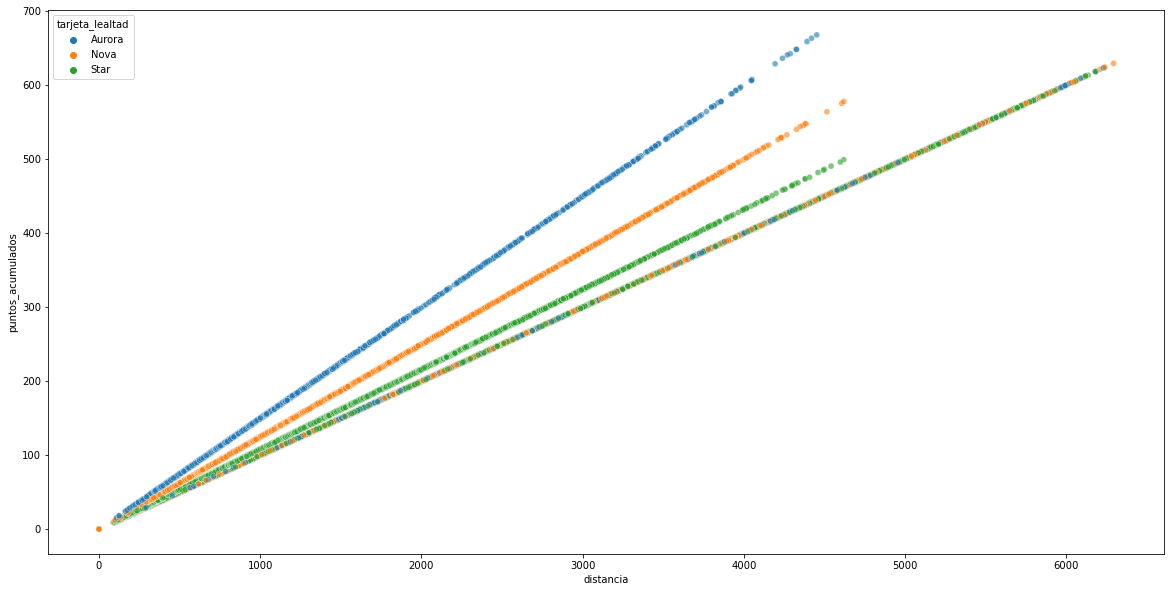

In [178]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = "distancia", 
                y = "puntos_acumulados", 
                data = df,
                hue = "tarjeta_lealtad",
                alpha=0.6); # Ajusta la transparencia de los puntos

Vemos que hay una relacion entre la distancia y los puntos acumulados, esto se ve afectado por el tipo de tarjeta del cliente. 
### VER CON DETALLE PORQUE APARECEN ESA 4 LIENA

In [192]:
df['ano'] = df['ano'].astype(int)
df['mes'] = df['mes'].astype(int)
df['dia'] = 1

# Crear la columna de fecha combinando año, mes y día
df['fecha_vuelo'] = pd.to_datetime(df[['ano', 'mes', 'dia']].rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'}))

# Verifica el resultado
print(df[['ano', 'mes', 'dia', 'fecha']].head())

    ano  mes  dia      fecha
0  2017    1    1 2017-01-01
1  2017    1    1 2017-01-01
2  2017    1    1 2017-01-01
3  2017    1    1 2017-01-01
4  2017    1    1 2017-01-01


In [193]:

df['dia_inscripcion'] = 1

# Crear la columna de fecha combinando año, mes y día
df['fecha_inscripcion'] = pd.to_datetime(df[['ano_inscripcion', 'mes_inscripcion', 'dia_inscripcion']].rename(columns={'ano_inscripcion': 'year', 'mes_inscripcion': 'month', 'dia_inscripcion': 'day'}))

# Verifica el resultado
print(df[['ano_inscripcion', 'mes_inscripcion', 'dia_inscripcion', 'fecha_inscripcion']].head())

   ano_inscripcion  mes_inscripcion  dia_inscripcion fecha_inscripcion
0             2016                8                1        2016-08-01
1             2013                3                1        2013-03-01
2             2016                7                1        2016-07-01
3             2015                8                1        2015-08-01
4             2014                1                1        2014-01-01


In [194]:
df['dia_cancelacion'] = 1

# Crear la columna de fecha combinando año, mes y día
df['fecha_cancelacion'] = pd.to_datetime(df[['ano_cancelacion', 'mes_cancelacion', 'dia_cancelacion']].rename(columns={'ano_cancelacion': 'year', 'mes_cancelacion': 'month', 'dia_cancelacion': 'day'}))

# Verifica el resultado
print(df[['ano_cancelacion', 'mes_cancelacion', 'dia_cancelacion', 'fecha_cancelacion']].head())

   ano_cancelacion  mes_cancelacion  dia_cancelacion fecha_cancelacion
0             2099               12                1        2099-12-01
1             2099               12                1        2099-12-01
2             2099               12                1        2099-12-01
3             2099               12                1        2099-12-01
4             2099               12                1        2099-12-01


In [200]:
def actualizar_tarjeta_lealtad (fecha_vuelo, fecha_inscripcion, fecha_cancelacion, tarjeta_lealtad):
    if fecha_inscripcion <= fecha_vuelo <= fecha_cancelacion:
        return tarjeta_lealtad
    else:
        return 'No Inscrito'

In [191]:
df.columns

Index(['numero_cliente', 'ano', 'mes', 'vuelos_reservados',
       'vuelos_con_acompanantes', 'total_vuelos', 'distancia',
       'puntos_acumulados', 'puntos_canjeados',
       'costo_en_dolares_de_los_puntos_canjeados', 'dia', 'fecha', 'pais',
       'provincia', 'ciudad', 'codigo_postal', 'genero', 'educacion',
       'salario', 'estado_civil', 'tarjeta_lealtad', 'valoracion_cliente',
       'tipo_inscripcion', 'ano_inscripcion', 'mes_inscripcion',
       'ano_cancelacion', 'mes_cancelacion', 'estado_cliente',
       'dia_inscripcion', 'fecha_inscripcion', 'dia_cancelacion',
       'fecha_cancelacion', 'fecha_vuelo'],
      dtype='object')

In [207]:
df['tarjeta_lealtad'] = df.apply(lambda fila: actualizar_tarjeta_lealtad(fila['fecha_vuelo'], fila['fecha_inscripcion'], fila['fecha_cancelacion'], fila['tarjeta_lealtad']),axis=1)

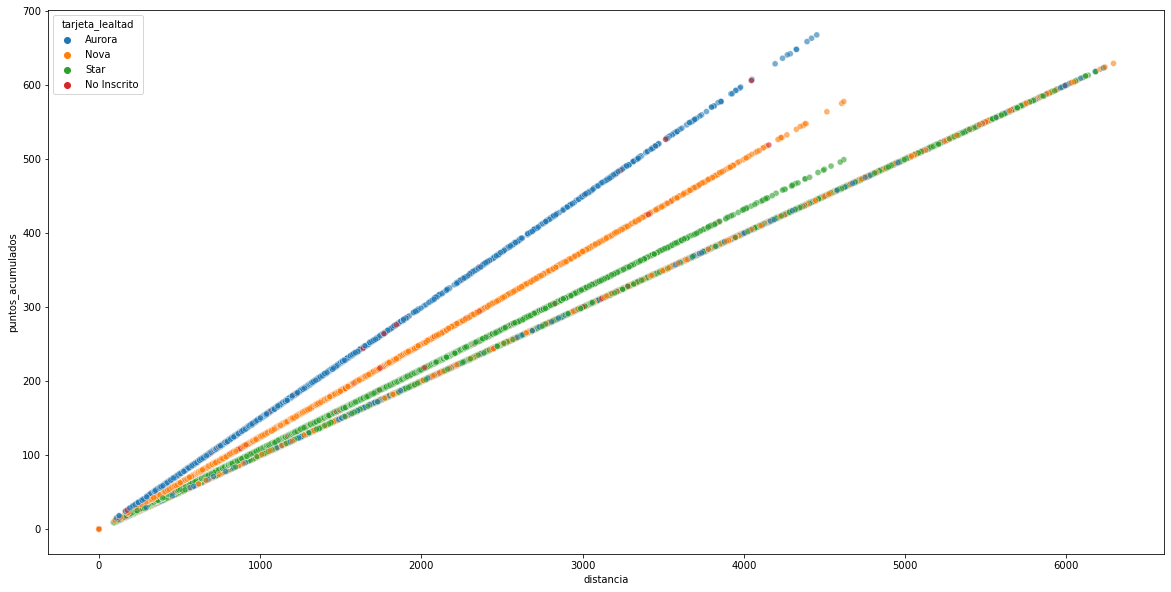

In [205]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x = "distancia", 
                y = "puntos_acumulados", 
                data = df,
                hue = "tarjeta_lealtad",
                alpha=0.6); # Ajusta la transparencia de los puntos

## 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
df2["provincia"].value_counts()

Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: provincia, dtype: int64

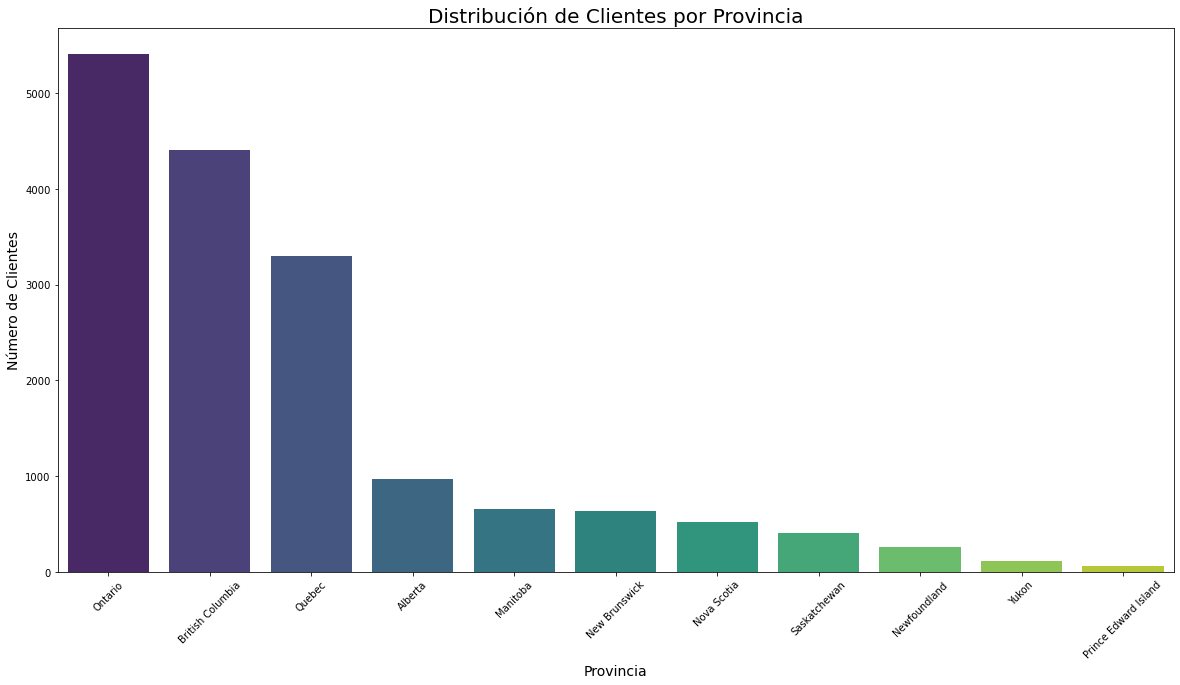

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x = "provincia", 
              data = df2,
              palette= "viridis",
              order = df2['provincia'].value_counts().index)
plt.title('Distribución de Clientes por Provincia', fontsize=20)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45);


Todos nuestros clientes pertenecen a Canada por lo que la representación la hacemos sobre las provincias. La provincia con mas clientes es Ontario

## 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Usamos seaborn porque no es necesario calcular la media por nivel educativo

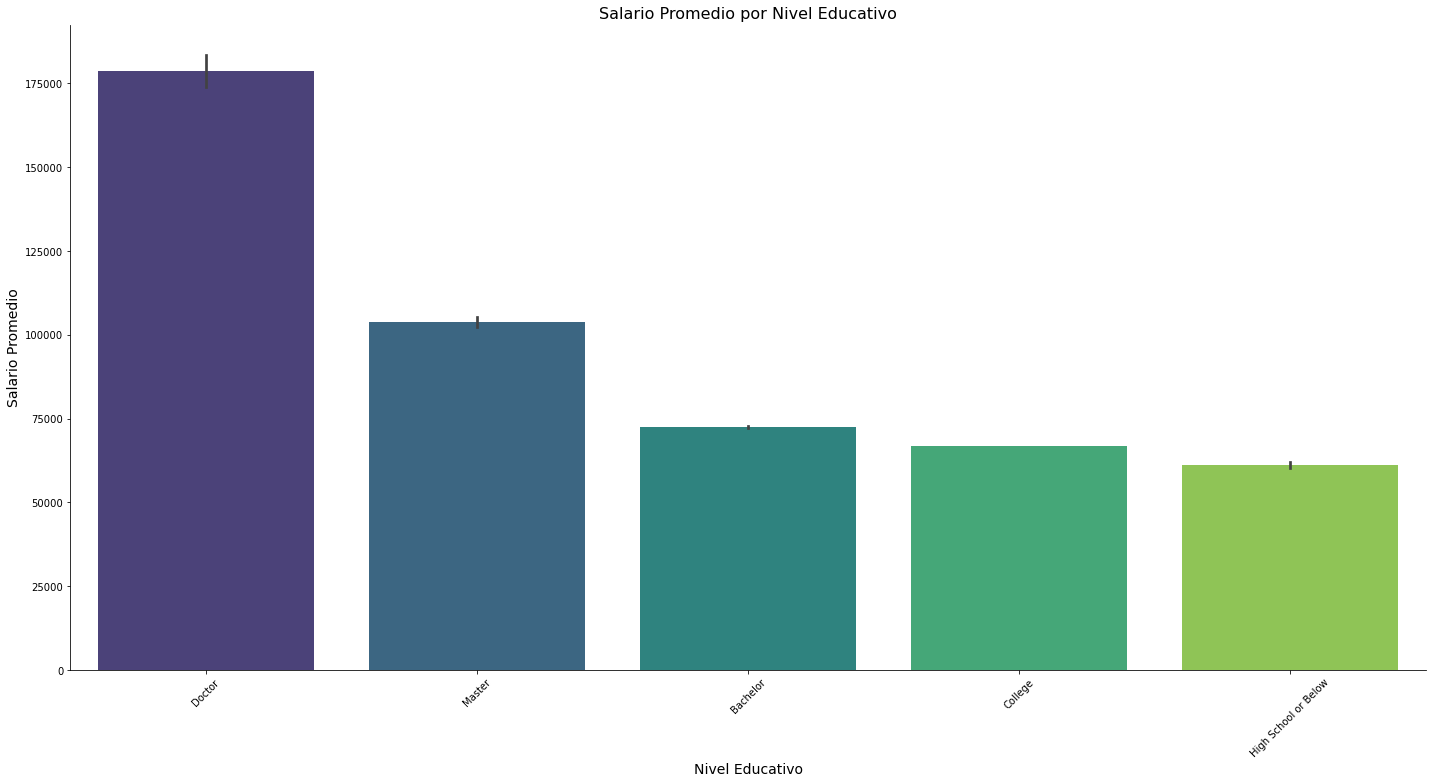

In [ ]:
# Tamaño de la gráfica
plt.figure(figsize=(20, 10))
sns.barplot(x = "educacion",
            y = "salario", 
            data = df2,
            palette= "viridis",
            order = ["Doctor","Master", "Bachelor", "College", "High School or Below"]) # Ordenamos

# Configurar los títulos y etiquetas
plt.title('Salario Promedio por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Salario Promedio', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)

# para quitar los ejes de arriba y de la derecha       
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

Podemos ver la barra con el intervalo de confianza. Que por defecto es del 95, en Collage no tenemos barra porque hemos introducido los valores ya que eran nan

Pero vamos hacerlo para hacer lo mismo con Matplotlib

In [ ]:
# Calcula el salario promedio por nivel educativo y ordenamos
salario_promedio = df2.groupby('educacion')['salario'].mean().reset_index().sort_values(by='salario', ascending=False)

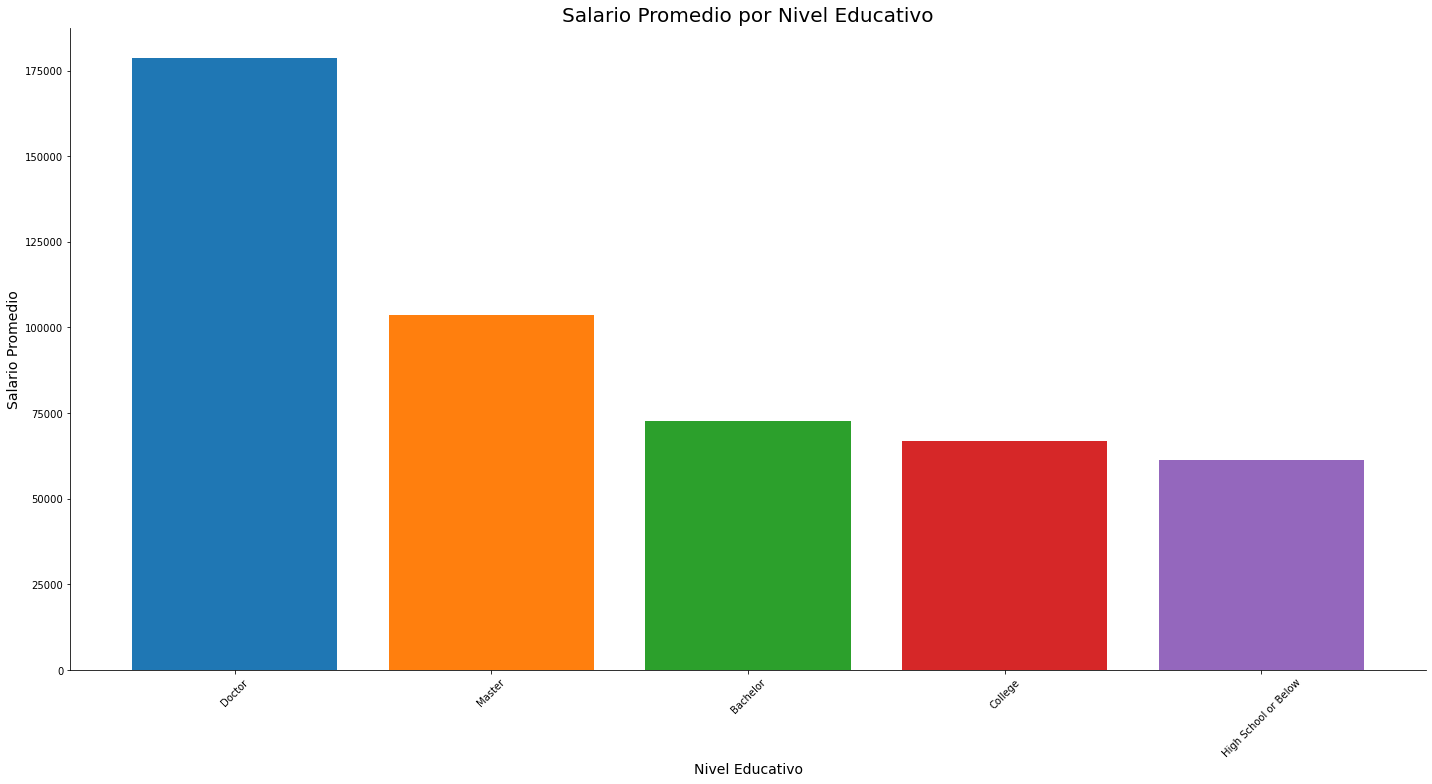

In [ ]:
# Tamaño de la gráfica
plt.figure(figsize=(20, 10))
# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
plt.bar(x = "educacion", 
        height=  "salario", 
        data = salario_promedio,
        color = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])        
# Configurar los títulos y etiquetas
plt.title('Salario Promedio por Nivel Educativo', fontsize=20)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Salario Promedio', fontsize=14)
plt.tight_layout()
plt.xticks(rotation=45)
# para quitar los ejes de arriba y de la derecha       
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False);

## 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

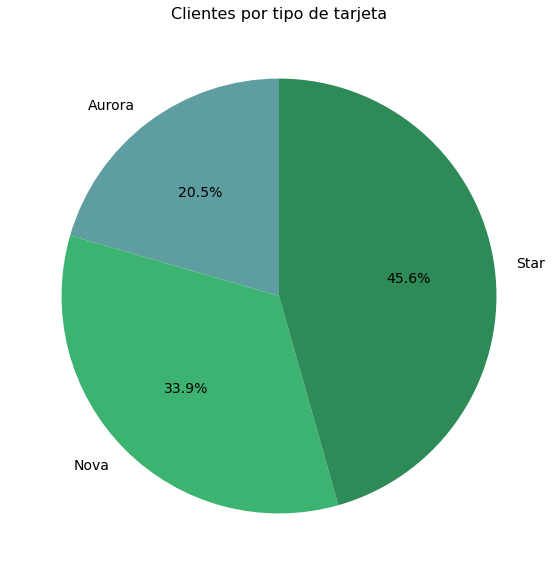

In [ ]:
# Agrupamos por tipo de tarjeta
df_tarjeta = df.groupby("tarjeta_lealtad")["numero_cliente"].count().reset_index()

plt.figure(figsize=(20, 10))
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["cadetblue", "mediumseagreen", "seagreen"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("numero_cliente", 
        labels= "tarjeta_lealtad",
        data = df_tarjeta, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 14}, # Tamaño de la fuente para las etiquetas
        startangle=90);

# Configurar los títulos y etiquetas
plt.title('Clientes por tipo de tarjeta', fontsize=16);


La tarjeta mas demandada por los clientes es la Star

## 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

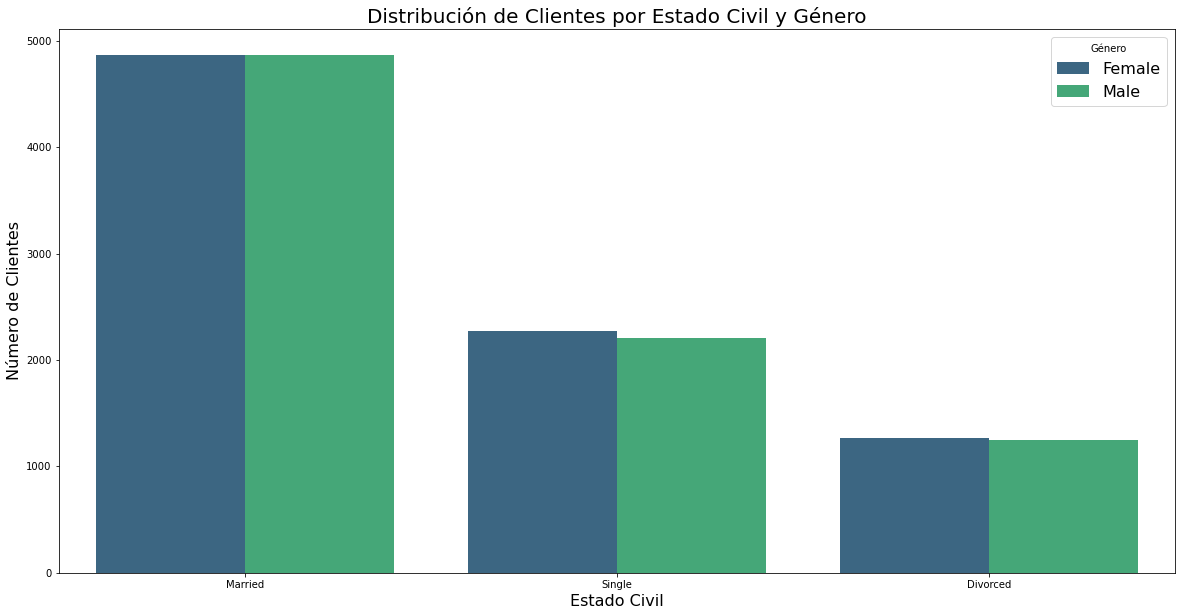

In [ ]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(20, 10))
sns.countplot(x='estado_civil', 
              hue='genero', 
              data=df2, 
              palette='viridis',
              order = ["Married", "Single", "Divorced"])
plt.title('Distribución de Clientes por Estado Civil y Género', fontsize=20)
plt.xlabel('Estado Civil', fontsize=16)
plt.ylabel('Número de Clientes', fontsize=16)
plt.legend(title='Género', fontsize=16);


Hay una proporción parecida entre nuestros clientes en función de su estado civil o genero